<a href="https://colab.research.google.com/github/celiahc823/leafs-plants/blob/main/Leafs_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enfermedades de plantas

https://www.tensorflow.org/datasets/catalog/plant_leaves?hl=es-419

In [1]:

#  IMPORTAR LIBRERÍAS

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import tensorflow_datasets as tfds

In [3]:

# PARÁMETROS

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
# CARGA Y PREPROCESAMIENTO DEL DATASET

def preprocess(example):
    image = example['image']
    label = example['label']
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

print("Cargando dataset...")
dataset, info = tfds.load('plant_leaves', split='train', with_info=True)
dataset = dataset.map(preprocess)

Cargando dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_leaves/incomplete.LENH02_0.1.1/plant_leaves-train.tfrecord*...:   0%…

Dataset plant_leaves downloaded and prepared to /root/tensorflow_datasets/plant_leaves/0.1.1. Subsequent calls will reuse this data.


In [5]:
print("Dividiendo dataset en entrenamiento y validación...")

images = []
labels = []

# Asegurar forma consistente y normalización
for image, label in dataset.as_numpy_iterator():
    images.append(image)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Dividir 80/20
total_size = len(images)
train_size = int(0.8 * total_size)

train_images = images[:train_size]
train_labels = labels[:train_size]
val_images = images[train_size:]
val_labels = labels[train_size:]

# Crear datasets de entrenamiento y validación
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Dividiendo dataset en entrenamiento y validación...


In [6]:
# CONSTRUIR MODELO CON TRANSFERENCIA DE APRENDIZAJE

print("Construyendo modelo con MobileNetV2...")
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(22, activation='softmax')  # 22 clases
])


Construyendo modelo con MobileNetV2...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
# COMPILAR Y ENTRENAR

print("Entrenando modelo...")
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

Entrenando modelo...
Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 37s 172ms/step - accuracy: 0.3340 - loss: 2.3087 - val_accuracy: 0.4095 - val_loss: 1.9702
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7386 - loss: 0.8854 - val_accuracy: 0.4972 - val_loss: 1.6198
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8370 - loss: 0.5644 - val_accuracy: 0.5860 - val_loss: 1.2903
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8683 - loss: 0.4269 - val_accuracy: 0.6604 - val_loss: 1.0313
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9012 - loss: 0.3355 - val_accuracy: 0.7048 - val_loss: 0.9266
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9185 - loss: 0.2825 - val_accuracy: 0.7736 - val_loss: 0.7104
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9406 - loss: 0.2280 - val_accuracy: 0.8102 - val_loss: 0.6123
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9426 - 

In [8]:
print("Accuracy final de entrenamiento:", history.history['accuracy'][-1])
print("Accuracy final de validación:", history.history['val_accuracy'][-1])

Accuracy final de entrenamiento: 0.9544571042060852
Accuracy final de validación: 0.8745837807655334


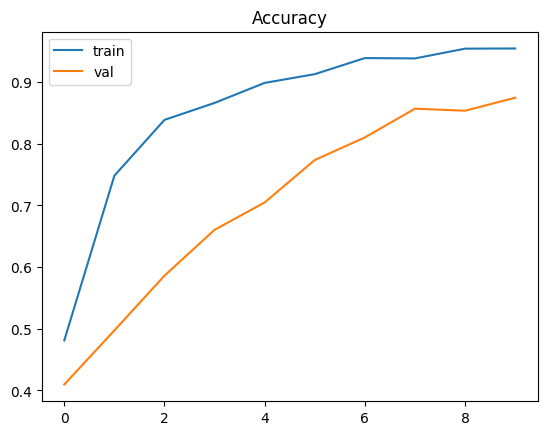

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'])
plt.show()


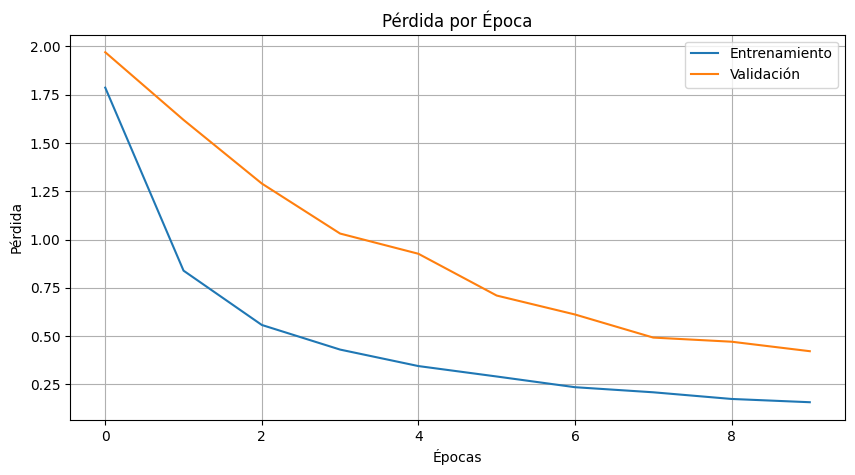

In [32]:
# Asegurar la carpeta de resultados
os.makedirs("results", exist_ok=True)

# Curva de Pérdida (Loss)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.savefig('results/loss_curve.png')
plt.show()

Calculando matriz de confusión...
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


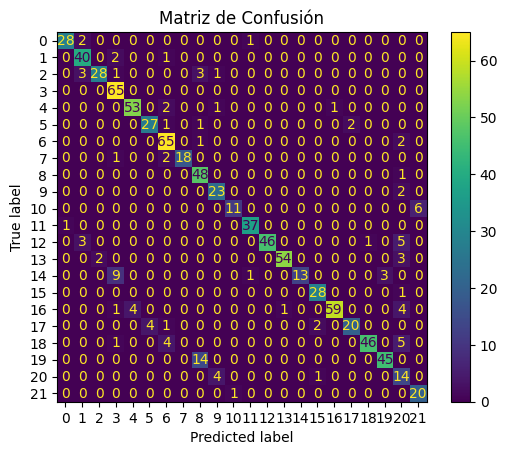

In [26]:

#  MATRIZ DE CONFUSIÓN
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#print("Calculando matriz de confusión...")

# Asegurar que val_images están en formato tensor
#X_val = tf.convert_to_tensor(val_images)
#y_true = val_labels

# Obtener predicciones
#y_pred = model.predict(X_val)
#y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
#cm = confusion_matrix(y_true, y_pred_classes)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap='viridis')
#plt.title("Matriz de Confusión")
#plt.show()

In [10]:
#  Clases utilziadas para la validación
print("\n Clases presentes en el conjunto de validación:")
val_labels_array = np.array(val_labels)
clases_validadas = np.unique(val_labels_array)
label_names = info.features['label'].names

for i in clases_validadas:
    print(f"{i}: {label_names[i]}")


 Clases presentes en el conjunto de validación:
0: Mango (P0) healthy
1: Arjun (P1) healthy
2: Alstonia Scholaris (P2) healthy
3: Gauva (P3) healthy
4: Jamun (P5) healthy
5: Jatropha (P6) healthy
6: Pongamia Pinnata (P7) healthy
7: Basil (P8) healthy
8: Pomegranate (P9) healthy
9: Lemon (P10) healthy
10: Chinar (P11) healthy
11: Mango (P0) diseased
12: Arjun (P1) diseased
13: Alstonia Scholaris (P2) diseased
14: Gauva (P3) diseased
15: Bael (P4) diseased
16: Jamun (P5) diseased
17: Jatropha (P6) diseased
18: Pongamia Pinnata (P7) diseased
19: Pomegranate (P9) diseased
20: Lemon (P10) diseased
21: Chinar (P11) diseased


In [28]:
import os
os.makedirs("results", exist_ok=True)

plt.savefig('results/accuracy_curve.png')
plt.savefig('results/accuracy_loss_curve.png')
plt.savefig('results/confusion_matrix.png')


<Figure size 640x480 with 0 Axes>

In [35]:
!pip freeze > requirements.txt
